In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:

def abrir_csv(path, **kwargs):
    '''
    Args:
        path (str): Path relativo al archivo csv
    Returns:
        DataFrame
    '''
    df = pd.read_csv(path)
    return df


def guardar_en_csv(df_filtrado, nombre_archivo):
    '''
    Args:
        df_filtrado: DataFrame con las columnas filtradas
        nombre_archivo (str): nombre del archivo de salida en csv
    '''

    df_filtrado.to_csv(nombre_archivo, index=False)



In [3]:
# Proyecto\IMT2200-ProyectoDS\limpieza\Archivo_1\limpieza_1.ipynb
path = os.path.join('../..', 'data', 'Impact_of_Remote_Work_on_Mental_Health.csv')
df = abrir_csv(path)
df.head(20)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,NaN,No,Increase,5,Unsatisfied,1,NaN,Average,South America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,24,4,2,High,NaN,Yes,Decrease,2,Unsatisfied,4,Daily,Poor,Europe
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America


In [4]:
df.columns

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')

In [5]:
# traducir columnas a español
columnas_traducidas = {
    'Employee_ID': 'ID_Empleado',
    'Age': 'Edad',
    'Gender': 'Genero',
    'Job_Role': 'Rol_de_Trabajo',
    'Industry': 'Industria',
    'Years_of_Experience': 'Años_de_Experiencia',
    'Work_Location': 'Ubicación_de_Trabajo',
    'Hours_Worked_Per_Week': 'Horas_Trabajadas_Por_Semana',
    'Number_of_Virtual_Meetings': 'Número_de_Reuniones_Virtuales',
    'Work_Life_Balance_Rating': 'Calificación_de_Equilibrio_Trabajo_Vida',
    'Stress_Level': 'Nivel_de_Estrés',
    'Mental_Health_Condition': 'Condición_de_Salud_Mental',
    'Access_to_Mental_Health_Resources': 'Acceso_a_Recursos_de_Salud_Mental',
    'Productivity_Change': 'Cambio_de_Productividad',
    'Social_Isolation_Rating': 'Calificación_de_Aislamiento_Social',
    'Satisfaction_with_Remote_Work': 'Satisfacción_con_Trabajo_Remoto',
    'Company_Support_for_Remote_Work': 'Apoyo_de_la_Empresa_para_Trabajo_Remoto',
    'Physical_Activity': 'Actividad_Física',
    'Sleep_Quality': 'Calidad_del_Sueño',
    'Region': 'Región'
}

df.rename(columns=columnas_traducidas, inplace=True)
df

,ID_Empleado,Edad,Genero,Rol_de_Trabajo,Industria,Años_de_Experiencia,Ubicación_de_Trabajo,Horas_Trabajadas_Por_Semana,Número_de_Reuniones_Virtuales,Calificación_de_Equilibrio_Trabajo_Vida,Nivel_de_Estrés,Condición_de_Salud_Mental,Acceso_a_Recursos_de_Salud_Mental,Cambio_de_Productividad,Calificación_de_Aislamiento_Social,Satisfacción_con_Trabajo_Remoto,Apoyo_de_la_Empresa_para_Trabajo_Remoto,Actividad_Física,Calidad_del_Sueño,Región
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [6]:
# eliminar columnas irrelevantes
df.drop(['ID_Empleado', 'Genero', 'Industria'], axis=1, inplace=True)
df.drop_duplicates(inplace=True)
df

,Edad,Rol_de_Trabajo,Años_de_Experiencia,Ubicación_de_Trabajo,Horas_Trabajadas_Por_Semana,Número_de_Reuniones_Virtuales,Calificación_de_Equilibrio_Trabajo_Vida,Nivel_de_Estrés,Condición_de_Salud_Mental,Acceso_a_Recursos_de_Salud_Mental,Cambio_de_Productividad,Calificación_de_Aislamiento_Social,Satisfacción_con_Trabajo_Remoto,Apoyo_de_la_Empresa_para_Trabajo_Remoto,Actividad_Física,Calidad_del_Sueño,Región
0,32,HR,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,40,Data Scientist,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,59,Software Engineer,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,27,Software Engineer,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,49,Sales,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,Sales,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,39,Sales,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,42,Sales,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,27,Sales,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Edad                                     5000 non-null   int64 
 1   Rol_de_Trabajo                           5000 non-null   object
 2   Años_de_Experiencia                      5000 non-null   int64 
 3   Ubicación_de_Trabajo                     5000 non-null   object
 4   Horas_Trabajadas_Por_Semana              5000 non-null   int64 
 5   Número_de_Reuniones_Virtuales            5000 non-null   int64 
 6   Calificación_de_Equilibrio_Trabajo_Vida  5000 non-null   int64 
 7   Nivel_de_Estrés                          5000 non-null   object
 8   Condición_de_Salud_Mental                3804 non-null   object
 9   Acceso_a_Recursos_de_Salud_Mental        5000 non-null   object
 10  Cambio_de_Productividad                  5000 non-null   obj

In [8]:
columnas_clave = [
    "Ubicación_de_Trabajo",
    "Horas_Trabajadas_Por_Semana",
    "Calificación_de_Equilibrio_Trabajo_Vida",
    "Nivel_de_Estrés",
    "Calificación_de_Aislamiento_Social",
    "Edad"
]
df = df.dropna(subset=columnas_clave)
df

,Edad,Rol_de_Trabajo,Años_de_Experiencia,Ubicación_de_Trabajo,Horas_Trabajadas_Por_Semana,Número_de_Reuniones_Virtuales,Calificación_de_Equilibrio_Trabajo_Vida,Nivel_de_Estrés,Condición_de_Salud_Mental,Acceso_a_Recursos_de_Salud_Mental,Cambio_de_Productividad,Calificación_de_Aislamiento_Social,Satisfacción_con_Trabajo_Remoto,Apoyo_de_la_Empresa_para_Trabajo_Remoto,Actividad_Física,Calidad_del_Sueño,Región
0,32,HR,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,40,Data Scientist,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,59,Software Engineer,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,27,Software Engineer,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,49,Sales,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,Sales,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,39,Sales,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,42,Sales,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,27,Sales,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


# Cómo influye en la modalidad de trabajo (remoto o presencial) en la salud mental de los trabajadores y cómo se relaciona esta con su nivel de productividad?

In [9]:
df.head(10)


,Edad,Rol_de_Trabajo,Años_de_Experiencia,Ubicación_de_Trabajo,Horas_Trabajadas_Por_Semana,Número_de_Reuniones_Virtuales,Calificación_de_Equilibrio_Trabajo_Vida,Nivel_de_Estrés,Condición_de_Salud_Mental,Acceso_a_Recursos_de_Salud_Mental,Cambio_de_Productividad,Calificación_de_Aislamiento_Social,Satisfacción_con_Trabajo_Remoto,Apoyo_de_la_Empresa_para_Trabajo_Remoto,Actividad_Física,Calidad_del_Sueño,Región
0,32,HR,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,40,Data Scientist,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,59,Software Engineer,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,27,Software Engineer,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,49,Sales,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,59,Sales,31,Hybrid,39,3,4,High,NaN,No,Increase,5,Unsatisfied,1,NaN,Average,South America
6,31,Sales,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,42,Data Scientist,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
8,56,Data Scientist,9,Hybrid,24,4,2,High,NaN,Yes,Decrease,2,Unsatisfied,4,Daily,Poor,Europe
9,30,HR,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America


In [10]:
# estrés por modalidad de trabajo
tabla_estres = (
    df.groupby(['Ubicación_de_Trabajo', 'Nivel_de_Estrés'])
      .size()                      
      .unstack(fill_value=0)       
)

tabla_estres.index = tabla_estres.index.str.replace('Remote', 'Remoto')
tabla_estres.index = tabla_estres.index.str.replace('Hybrid', 'Híbrido')
tabla_estres.index = tabla_estres.index.str.replace('Onsite', 'Presencial')

tabla_estres = tabla_estres.rename(columns={
    'High': 'Alto',
    'Medium': 'Medio',
    'Low': 'Bajo'
})

# como reubicar las columnas de bajo medio a alto 
tabla_estres = tabla_estres[['Bajo', 'Medio', 'Alto']]
tabla_estres


Nivel_de_Estrés,Bajo,Medio,Alto
Ubicación_de_Trabajo,,,
Híbrido,543,545,561
Presencial,555,547,535
Remoto,547,577,590


In [11]:
# cambiar el orden de las filas tal que sea presencial, híbrido, remoto
tabla_estres = tabla_estres.reindex(['Presencial', 'Híbrido', 'Remoto'])
tabla_estres

Nivel_de_Estrés,Bajo,Medio,Alto
Ubicación_de_Trabajo,,,
Presencial,555,547,535
Híbrido,543,545,561
Remoto,547,577,590


In [12]:
tabla_estres.min()

Nivel_de_Estrés
Bajo     543
Medio    545
Alto     535
dtype: int64

In [13]:
tabla_estres.max()

Nivel_de_Estrés
Bajo     555
Medio    577
Alto     590
dtype: int64

In [14]:
tabla_estres.value_counts

<bound method DataFrame.value_counts of Nivel_de_Estrés       Bajo  Medio  Alto
Ubicación_de_Trabajo                   
Presencial             555    547   535
Híbrido                543    545   561
Remoto                 547    577   590>

Dado que la mínima cantidad de personas contadas en este dataset dado la tabla de estres es 275, los gráficos que se desean visualizar comenzarán desde el 200 para poder visualizar la diferencia.

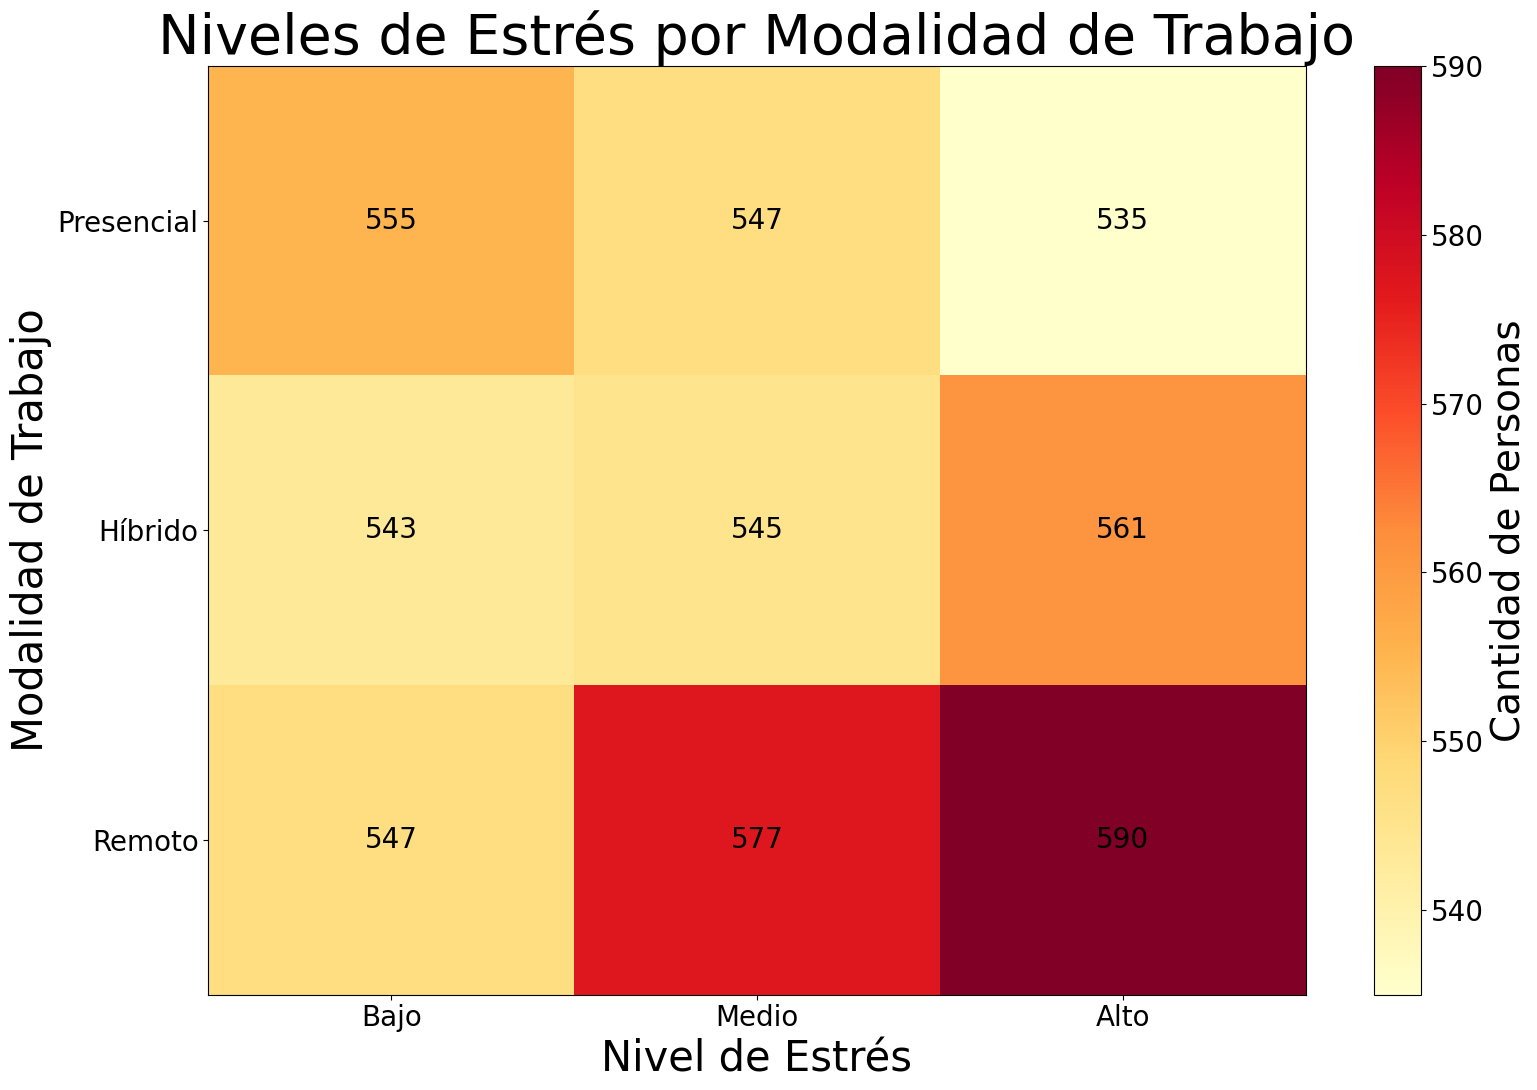

In [15]:
data_matrix = tabla_estres.values
labels_x = tabla_estres.columns
labels_y = tabla_estres.index

plt.figure(figsize=(16,11))

# Mostrar heatmap
im = plt.imshow(data_matrix, cmap="YlOrRd", aspect='auto')

# Mostrar número en cada celda
for i in range(data_matrix.shape[0]):
    for j in range(data_matrix.shape[1]):
        plt.text(j, i, int(data_matrix[i,j]), ha='center', va='center', color='black', fontsize=20)

# Configurar ticks y etiquetas
plt.xticks(range(len(labels_x)), labels_x, fontsize=20)
plt.yticks(range(len(labels_y)), labels_y, fontsize=20)

# Título y etiquetas
plt.title("Niveles de Estrés por Modalidad de Trabajo", fontsize=40)
plt.xlabel("Nivel de Estrés", fontsize=30)
plt.ylabel("Modalidad de Trabajo", fontsize=30)

# Barra de color
cbar = plt.colorbar(im)
cbar.set_label("Cantidad de Personas", fontsize=28)
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()
plt.savefig("gráfico_calor_matplotlib.png", dpi=300)
plt.show()


Los trabajadores remotos tienen más estrés medio (305 personas, color rojo oscuro) y alto (304 personas). Los números son muy similares entre modalidades, por eso es difícil ver diferencias reales.

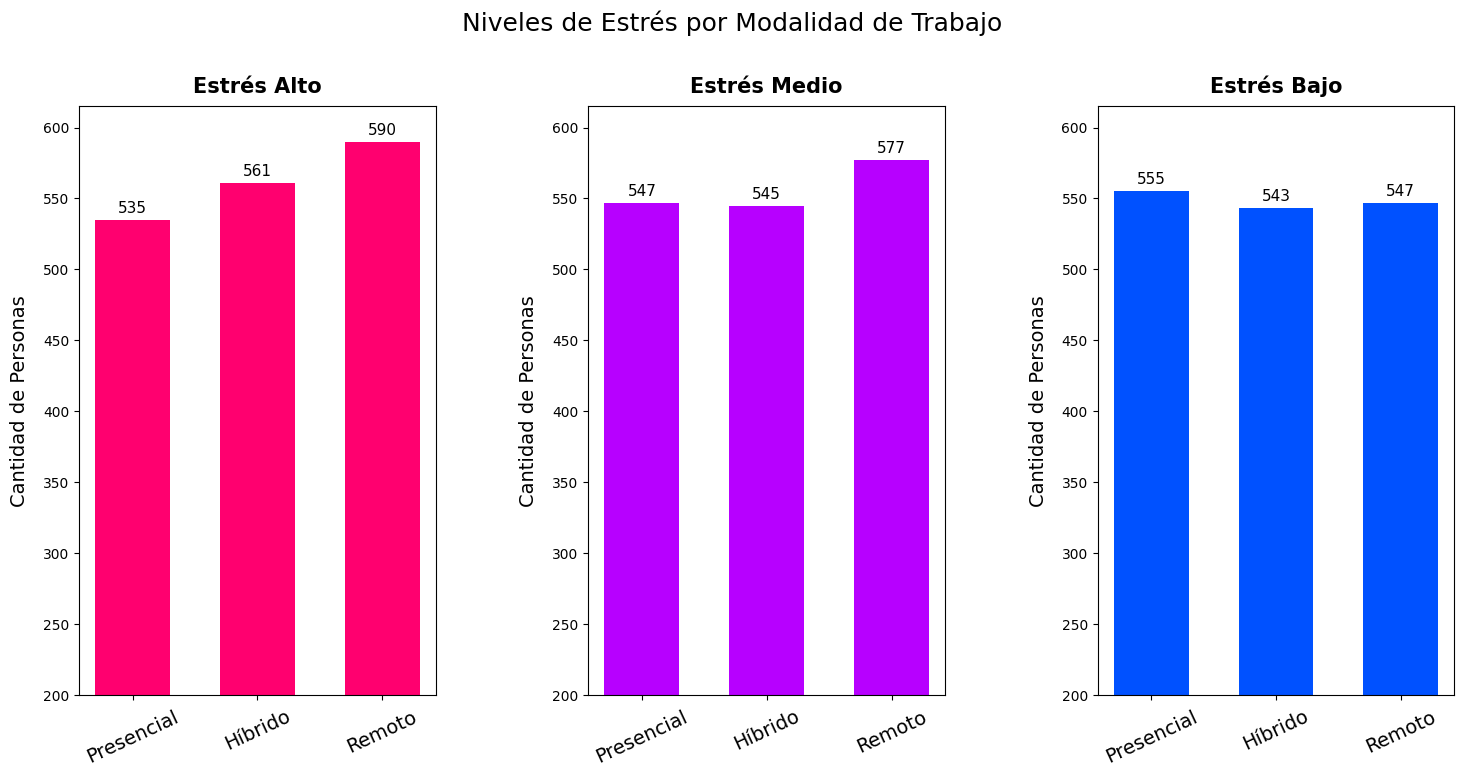

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
niveles_estres = ['Alto', 'Medio', 'Bajo']

# Recorrer cada nivel de estrés y crear un gráfico para cada uno
for i, nivel in enumerate(niveles_estres):
    grafico_actual = axes[i]
    datos_nivel = tabla_estres[nivel]
    colores = ["#ff006f", "#b700ff", "#0051ff"]
    color_actual = colores[i]
    
    barras = grafico_actual.bar(datos_nivel.index, datos_nivel.values, color=color_actual, width=0.6) #.bar funcion matplotlib
    # datos_nivel.index = nombres modalidades [Híbrido, Presencial, Remoto] 
    # datos_nivel.values = cantidades [282, 282, 304]
    
    grafico_actual.set_title(f'Estrés {nivel}', fontsize=15, pad=10, fontweight='bold')
    grafico_actual.set_ylabel('Cantidad de Personas', fontsize=14, labelpad=10)
    
    valor_maximo = tabla_estres.values.max()
    grafico_actual.set_ylim(200, valor_maximo + 25)  #scala al máximo+20
    grafico_actual.tick_params(axis='x', rotation=25, labelsize=14, pad=5)
    
    #número encima de cada barra
    for barra in barras:
        altura_barra = barra.get_height()
        posicion_x = barra.get_x() + barra.get_width()/2 #centro de la barra
        posicion_y = altura_barra + 3
        
        # escribir el número en esa posición
        grafico_actual.text(posicion_x, posicion_y, f'{int(altura_barra)}', 
                          ha='center', va='bottom', fontsize=11)

plt.suptitle('Niveles de Estrés por Modalidad de Trabajo', fontsize=18)
plt.tight_layout(pad=2, w_pad=6)
plt.show()

In [17]:
tabla_estres.columns

Index(['Bajo', 'Medio', 'Alto'], dtype='object', name='Nivel_de_Estrés')

In [18]:
tabla_estres.reset_index().columns

Index(['Ubicación_de_Trabajo', 'Bajo', 'Medio', 'Alto'], dtype='object', name='Nivel_de_Estrés')

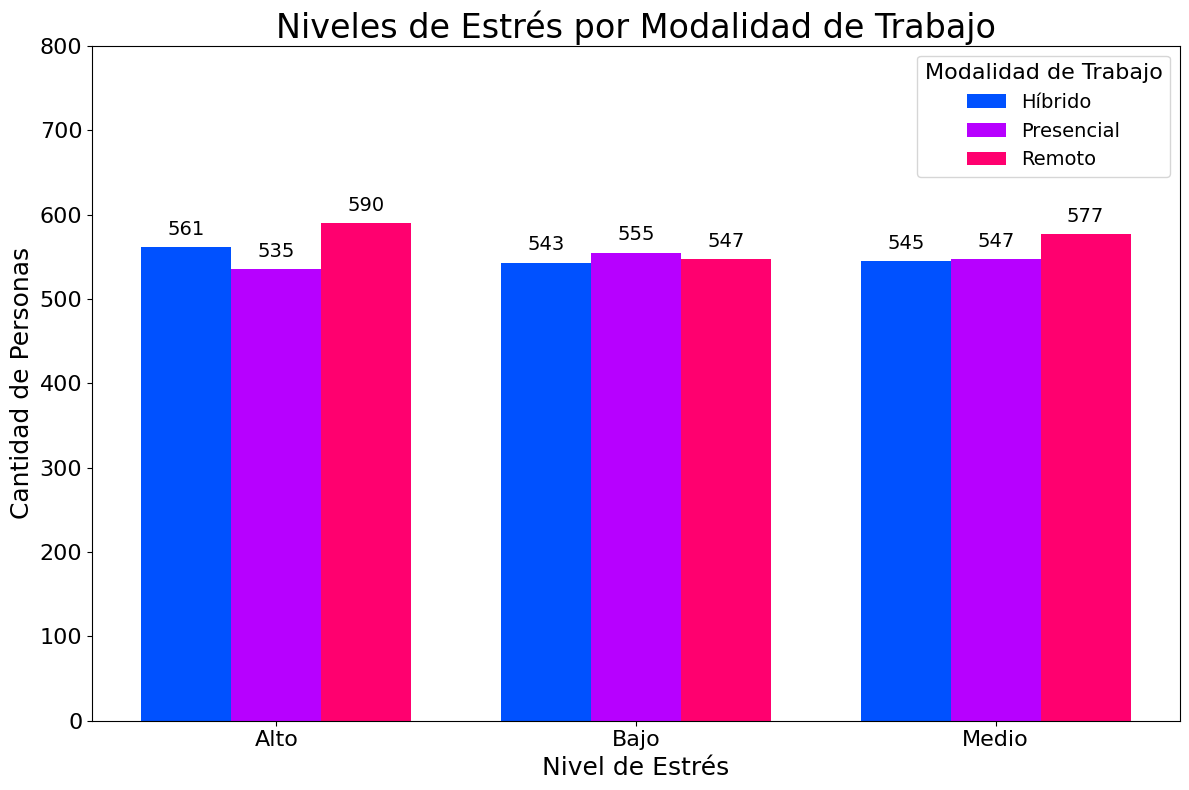

In [19]:
tabla_long = tabla_estres.reset_index().melt(
    id_vars='Ubicación_de_Trabajo',   
    value_vars=['Bajo','Medio','Alto'],
    var_name='Nivel de estrés',
    value_name='Cantidad de Personas'
)
tabla_pivot = tabla_long.pivot(index='Nivel de estrés', columns='Ubicación_de_Trabajo', values='Cantidad de Personas')

niveles = tabla_pivot.index
modalidades = tabla_pivot.columns
x = np.arange(len(niveles))
width = 0.25
colors = ["#0051ff", "#b700ff", "#ff006f"]

plt.figure(figsize=(12,8))  # más compacto

# Graficar barras
for i, modalidad in enumerate(modalidades):
    plt.bar(x + i*width, tabla_pivot[modalidad], width=width, label=modalidad, color=colors[i])

# Números encima de cada barra
for i, modalidad in enumerate(modalidades):
    for j, value in enumerate(tabla_pivot[modalidad]):
        plt.text(j + i*width, value + 10, int(value), ha='center', va='bottom', fontsize=14)

plt.xticks(x + width, niveles, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0, 800)  # eje Y hasta 800

plt.title("Niveles de Estrés por Modalidad de Trabajo", fontsize=24)
plt.xlabel("Nivel de Estrés", fontsize=18)
plt.ylabel("Cantidad de Personas", fontsize=18)
plt.legend(title="Modalidad de Trabajo", title_fontsize=16, fontsize=14)

plt.tight_layout()
plt.savefig("grafico_barras_matplotlib_800.png", dpi=300)
plt.show()

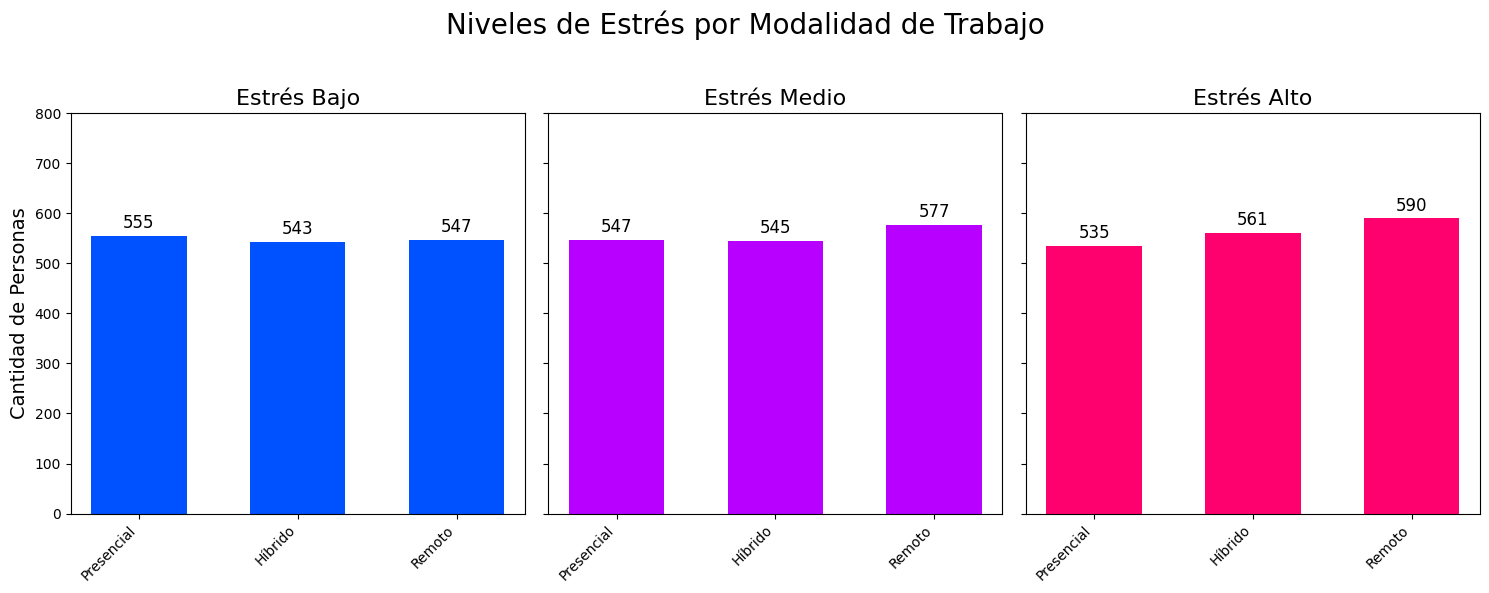

In [20]:
niveles_estres = ['Bajo', 'Medio', 'Alto']
colores = ["#0051ff", "#b700ff", "#ff006f"]

modalidades = tabla_estres.index.tolist()
x = np.arange(len(modalidades))  # posiciones de las modalidades
width = 0.6  # ancho de las barras

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

for i, nivel in enumerate(niveles_estres):
    axes[i].bar(x, tabla_estres[nivel], color=colores[i], width=width)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(modalidades, rotation=45, ha='right')
    axes[i].set_title(f"Estrés {nivel}", fontsize=16)
    axes[i].set_ylim(0, 800)
    
    for j, val in enumerate(tabla_estres[nivel]):
        axes[i].text(j, val + 15, str(val), ha='center', fontsize=12)

axes[0].set_ylabel("Cantidad de Personas", fontsize=14)
fig.suptitle("Niveles de Estrés por Modalidad de Trabajo", fontsize=20)
fig.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

In [ ]:
df

,Edad,Rol_de_Trabajo,Años_de_Experiencia,Ubicación_de_Trabajo,Horas_Trabajadas_Por_Semana,Número_de_Reuniones_Virtuales,Calificación_de_Equilibrio_Trabajo_Vida,Nivel_de_Estrés,Condición_de_Salud_Mental,Acceso_a_Recursos_de_Salud_Mental,Cambio_de_Productividad,Calificación_de_Aislamiento_Social,Satisfacción_con_Trabajo_Remoto,Apoyo_de_la_Empresa_para_Trabajo_Remoto,Actividad_Física,Calidad_del_Sueño,Región
0,32,HR,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,40,Data Scientist,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,59,Software Engineer,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,27,Software Engineer,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,49,Sales,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,Sales,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,39,Sales,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,42,Sales,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,27,Sales,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [68]:
a =df["Condición_de_Salud_Mental"].unique()
a

array(['Depression', 'Anxiety', nan, 'Burnout'], dtype=object)

In [53]:
promedios = df.groupby("Ubicación_de_Trabajo")["Calificación_de_Equilibrio_Trabajo_Vida"].mean()
print(promedios)

Ubicación_de_Trabajo
Hybrid    3.022438
Onsite    2.946854
Remote    2.983081
Name: Calificación_de_Equilibrio_Trabajo_Vida, dtype: float64


In [28]:
df_temp = df.copy()

In [70]:
# Nivel estres
estr_map = {"Low":1, "Medium":2, "High":3}
df_temp["Nivel_de_Estrés_num"] = df_temp["Nivel_de_Estrés"].map(estr_map)

# Calidad del sueño
sueño_map = {"Bad":1, "Fair":2, "Good":3, "Excellent":4}
df_temp["Calidad_del_Sueño_num"] = df_temp["Calidad_del_Sueño"].map(sueño_map)

# Equilibrio vida-trabajo
equilibrio_map = {"1":1, "2":2, "3":3, "4":4, "5":5}
df_temp["Equilibrio_num"] = df_temp["Calificación_de_Equilibrio_Trabajo_Vida"].astype(float)

# Aislamiento social (si aplica)
aislamiento_map = {"1":1, "2":2, "3":3, "4":4, "5":5}
df_temp["Aislamiento_num"] = df_temp["Calificación_de_Aislamiento_Social"].map(aislamiento_map)

# Satisfacción laboral
satisf_map = {"Unsatisfied":0, "Neutral":1, "Satisfied":2}
df_temp["Satisfacción_num"] = df_temp["Satisfacción_con_Trabajo_Remoto"].map(satisf_map)

# Salud mental (para correlaciones)
df_temp["Salud_Mental_cat"] = df_temp["Condición_de_Salud_Mental"].replace(
    {"Depression":"Con condición", "Anxiety":"Con condición", "Burnout":"Con condición"}
)
df_temp["Salud_Mental_cat"] = df_temp["Salud_Mental_cat"].fillna("Sin condición")


# Productividad: si es categórica (Increase/No change/Decrease)
prod_labels = {"Decrease":0, "No change":1, "Increase":2}
df_temp["Productividad_num"] = df_temp["Cambio_de_Productividad"].map(prod_labels)

# Actividad física
act_map = {"Never":0, "Weekly":1, "Daily":2}
df_temp["Actividad_num"] = df_temp["Actividad_Física"].map(act_map)


C:\Users\gabri\AppData\Local\Temp\ipykernel_7228\2345199051.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\gabri\AppData\Local\Temp\ipykernel_7228\2345199051.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


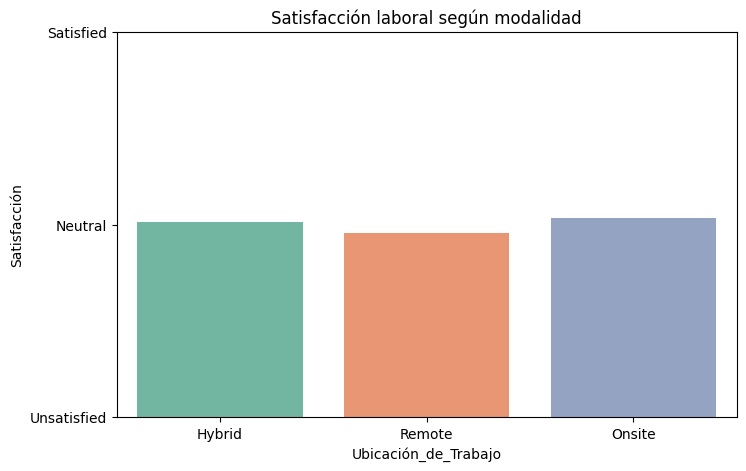

In [71]:
# Diccionario de mapeo inverso para etiquetas
satisf_labels = {0:"Unsatisfied", 1:"Neutral", 2:"Satisfied"}

plt.figure(figsize=(8,5))
sns.barplot(
    data=df_temp,
    x="Ubicación_de_Trabajo",
    y="Satisfacción_num",
    palette="Set2",
    ci=None
)
plt.title("Satisfacción laboral según modalidad")
plt.ylabel("Satisfacción")
# Cambiar los ticks del eje y para mostrar los labels
plt.yticks(list(satisf_labels.keys()), list(satisf_labels.values()))
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_7228\2117944214.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\gabri\AppData\Local\Temp\ipykernel_7228\2117944214.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


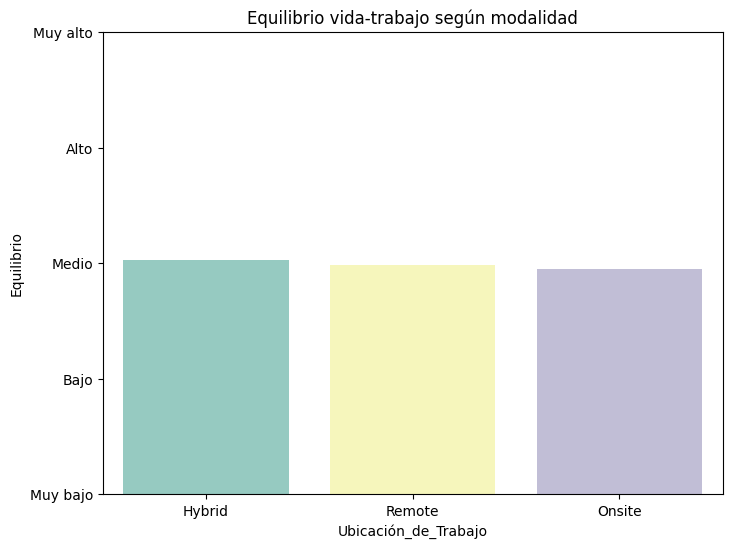

C:\Users\gabri\AppData\Local\Temp\ipykernel_7228\2117944214.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\gabri\AppData\Local\Temp\ipykernel_7228\2117944214.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


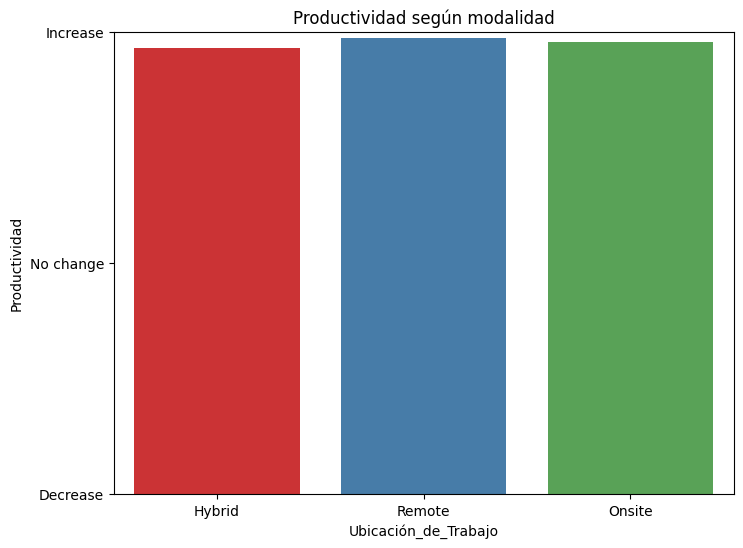

In [62]:
# 2. Equilibrio vida-trabajo vs productividad
equilibrio_labels = {1:"Muy bajo", 2:"Bajo", 3:"Medio", 4:"Alto", 5:"Muy alto"}

plt.figure(figsize=(8,6))
sns.barplot(
    data=df_temp,
    x="Ubicación_de_Trabajo",
    y="Equilibrio_num",
    palette="Set3",
    ci=None
)
plt.title("Equilibrio vida-trabajo según modalidad")
plt.ylabel("Equilibrio")
plt.ylim(1,5)
plt.yticks(list(equilibrio_labels.keys()), list(equilibrio_labels.values()))
plt.show()

prod_labels = {0:"Decrease", 1:"No change", 2:"Increase"}

plt.figure(figsize=(8,6))
sns.barplot(
    data=df_temp,
    x="Ubicación_de_Trabajo",
    y="Productividad_num",
    palette="Set1",
    ci=None
)
plt.title("Productividad según modalidad")
plt.ylabel("Productividad")
plt.ylim(1,2)
plt.yticks(list(prod_labels.keys()), list(prod_labels.values()))
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_7228\687626210.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


ConversionError: Failed to convert value(s) to axis units: ['Decrease', 'No change', 'Increase']

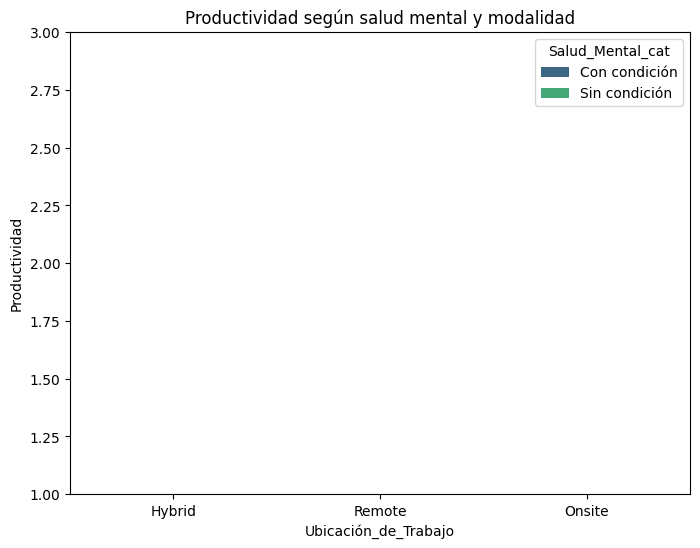

In [72]:
# 3. Relación salud mental y productividad por modalidad
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_temp,
    x="Ubicación_de_Trabajo",
    y="Productividad_num",
    hue="Salud_Mental_cat",
    palette="viridis",
    ci=None
)
plt.title("Productividad según salud mental y modalidad")
plt.ylabel("Productividad")
plt.ylim(1,3)
plt.yticks(list(prod_labels.keys()), list(prod_labels.values()))
plt.legend(title="Salud Mental")
plt.show()

In [ ]:
# 4. Estrés y horas trabajadas
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_temp,
    x="Horas_Trabajadas_Por_Semana",
    y="Nivel_de_Estrés_num",
    hue="Ubicación_de_Trabajo",
    alpha=0.7
)
plt.title("Horas trabajadas vs nivel de estrés")
plt.ylabel("Nivel de estrés (numérico)")
plt.show()

In [ ]:
# 5. Correlación salud mental y productividad
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_temp,
    x="Salud_Mental_num",
    y="Productividad_num",
    hue="Ubicación_de_Trabajo",
    alpha=0.7
)
plt.title("Relación salud mental y productividad por modalidad")
plt.ylabel("Productividad (numérica)")
plt.xlabel("Salud mental (numérica)")
plt.show()

In [ ]:
# 6. Aislamiento social según actividad física y modalidad
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_temp,
    x="Actividad_num",
    y="Aislamiento_num",
    hue="Ubicación_de_Trabajo",
    palette="Set1"
)
plt.title("Aislamiento social según actividad física y modalidad")
plt.ylabel("Aislamiento (numérico)")
plt.xlabel("Actividad física (numérica)")
plt.show()

In [ ]:
# 7. Correlación sueño y bienestar
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_temp,
    x="Ubicación_de_Trabajo",
    y="Calidad_del_Sueño_num",
    palette="Set2"
)
plt.title("Calidad del sueño según modalidad")
plt.ylabel("Calidad del sueño (numérica)")
plt.show()